In [12]:
import numpy as np 
import pandas as pd

df = pd.read_csv('petrolconsumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driverlicence,Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [13]:
print(df.isnull().sum())

Petrol_tax                  0
Average_income              0
Paved_Highways              0
Population_Driverlicence    0
Petrol_Consumption          0
dtype: int64


Handling missing values ->no missing values
Handling label encoding data -> no categorical values

In [14]:
numerical_cols = df.columns[[0,1,2,3]]
target_cols = df.columns[4]


In [15]:
# performing feature scaling on numerical data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df[numerical_cols])
y = df[target_cols]


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

Making predicitions

In [18]:
y_pred = model.predict(X_test)
y_pred

array([572.45618616, 662.37757489, 560.1523572 , 401.94789338,
       681.01975419, 560.19142682, 716.44568884, 710.07531539,
       648.37211838, 462.55333864])

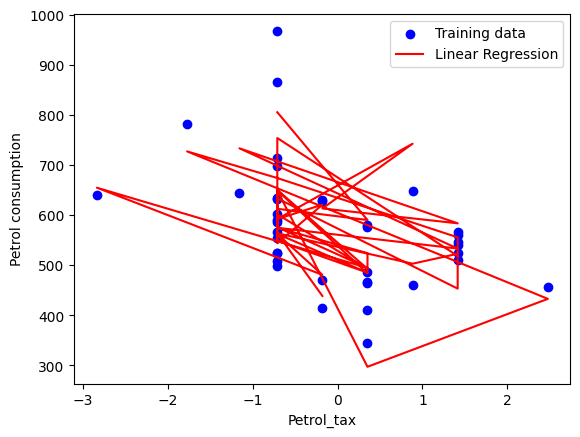

In [19]:
import matplotlib.pyplot as plt

# Choose a feature from X_train
feature_index = 0  # Choose the index of the feature you want to plot
feature_name = df.columns[[0, 1]][feature_index]  # Get the feature name
plt.scatter(X_train[:, feature_index], y_train, color='blue', label='Training data')
plt.plot(X_train[:, feature_index], model.predict(X_train), color='red', label='Linear Regression')

plt.xlabel(feature_name)
plt.ylabel('Petrol consumption')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.15248546267372387
